# Dataset Inspection

## Dependencies

In [1]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Energy Anomaly Detection

Now let's do something similar to the other dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

energy_anomaly = pd.read_csv('energy_anomaly_detection/train_features.csv')

energy_anomaly.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


Let's try to visualize the missing data in the dataset, by plottig the percentage of missing data for each column:

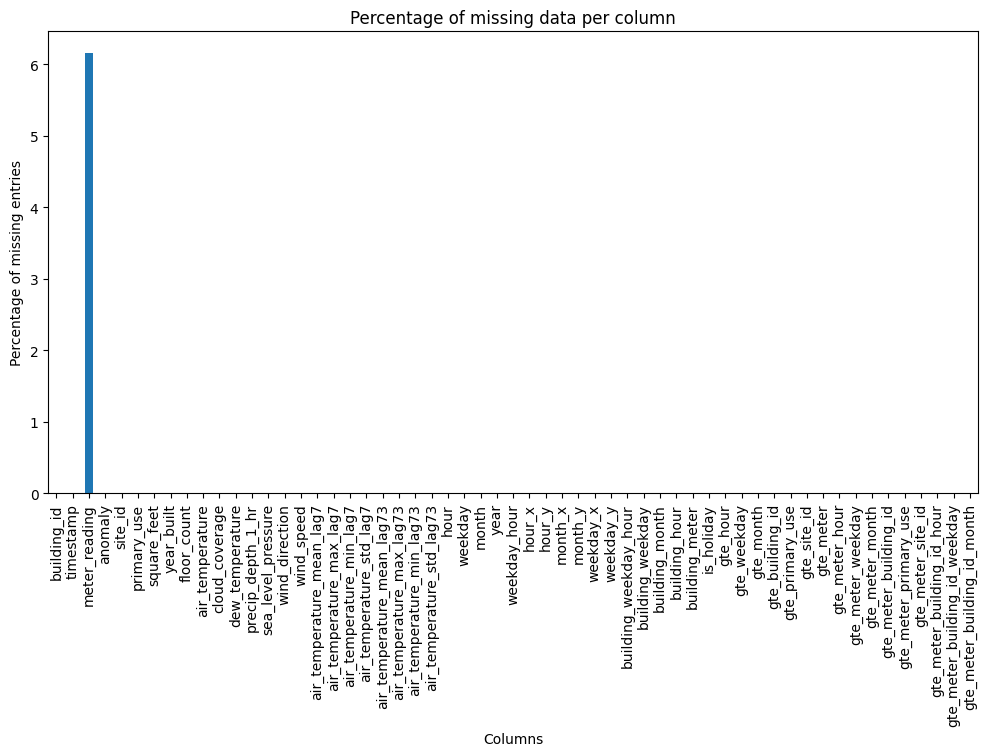

In [5]:
percent_missing = energy_anomaly.isna().mean() * 100

plt.figure(figsize=(12, 6))
percent_missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing entries')
plt.title("Percentage of missing data per column")
plt.show()

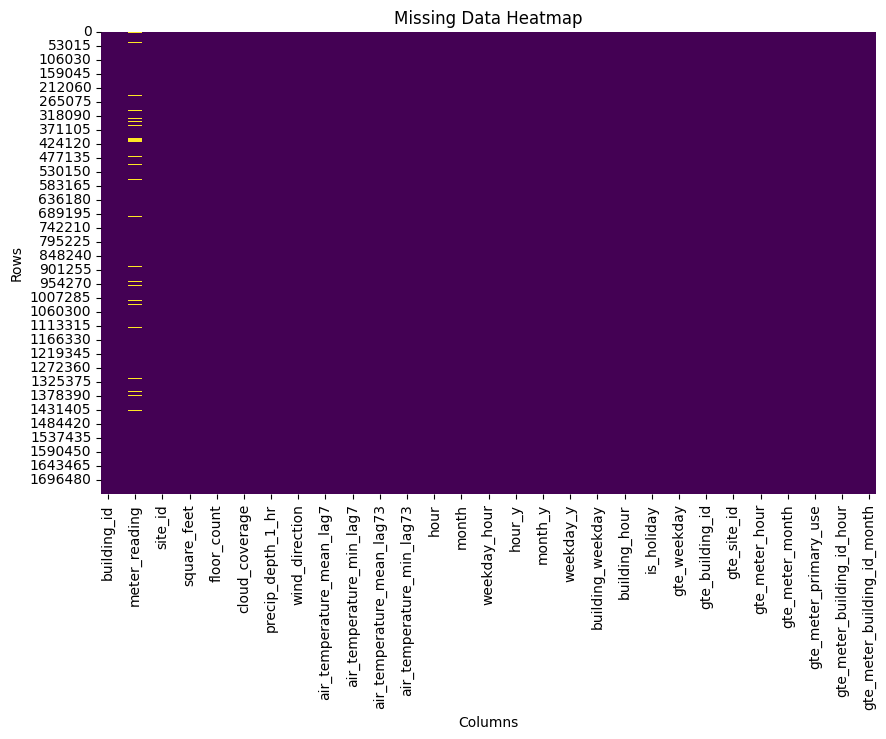

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(energy_anomaly.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


Firstly, let's check the meter readings.

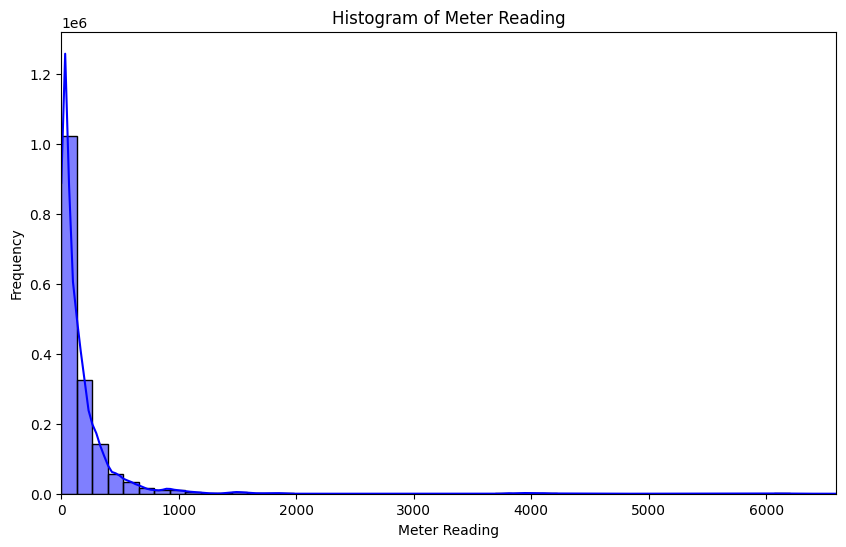

In [10]:
max_meter_reading = energy_anomaly['meter_reading'].max()

plt.figure(figsize=(10, 6))
sns.histplot(energy_anomaly['meter_reading'], bins=50, kde=True, color='blue')
plt.title('Histogram of Meter Reading')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')

plt.xlim(left=0, right=max_meter_reading) 
plt.show()


Pair plots to see what are the relationships of the different numercical attributes.

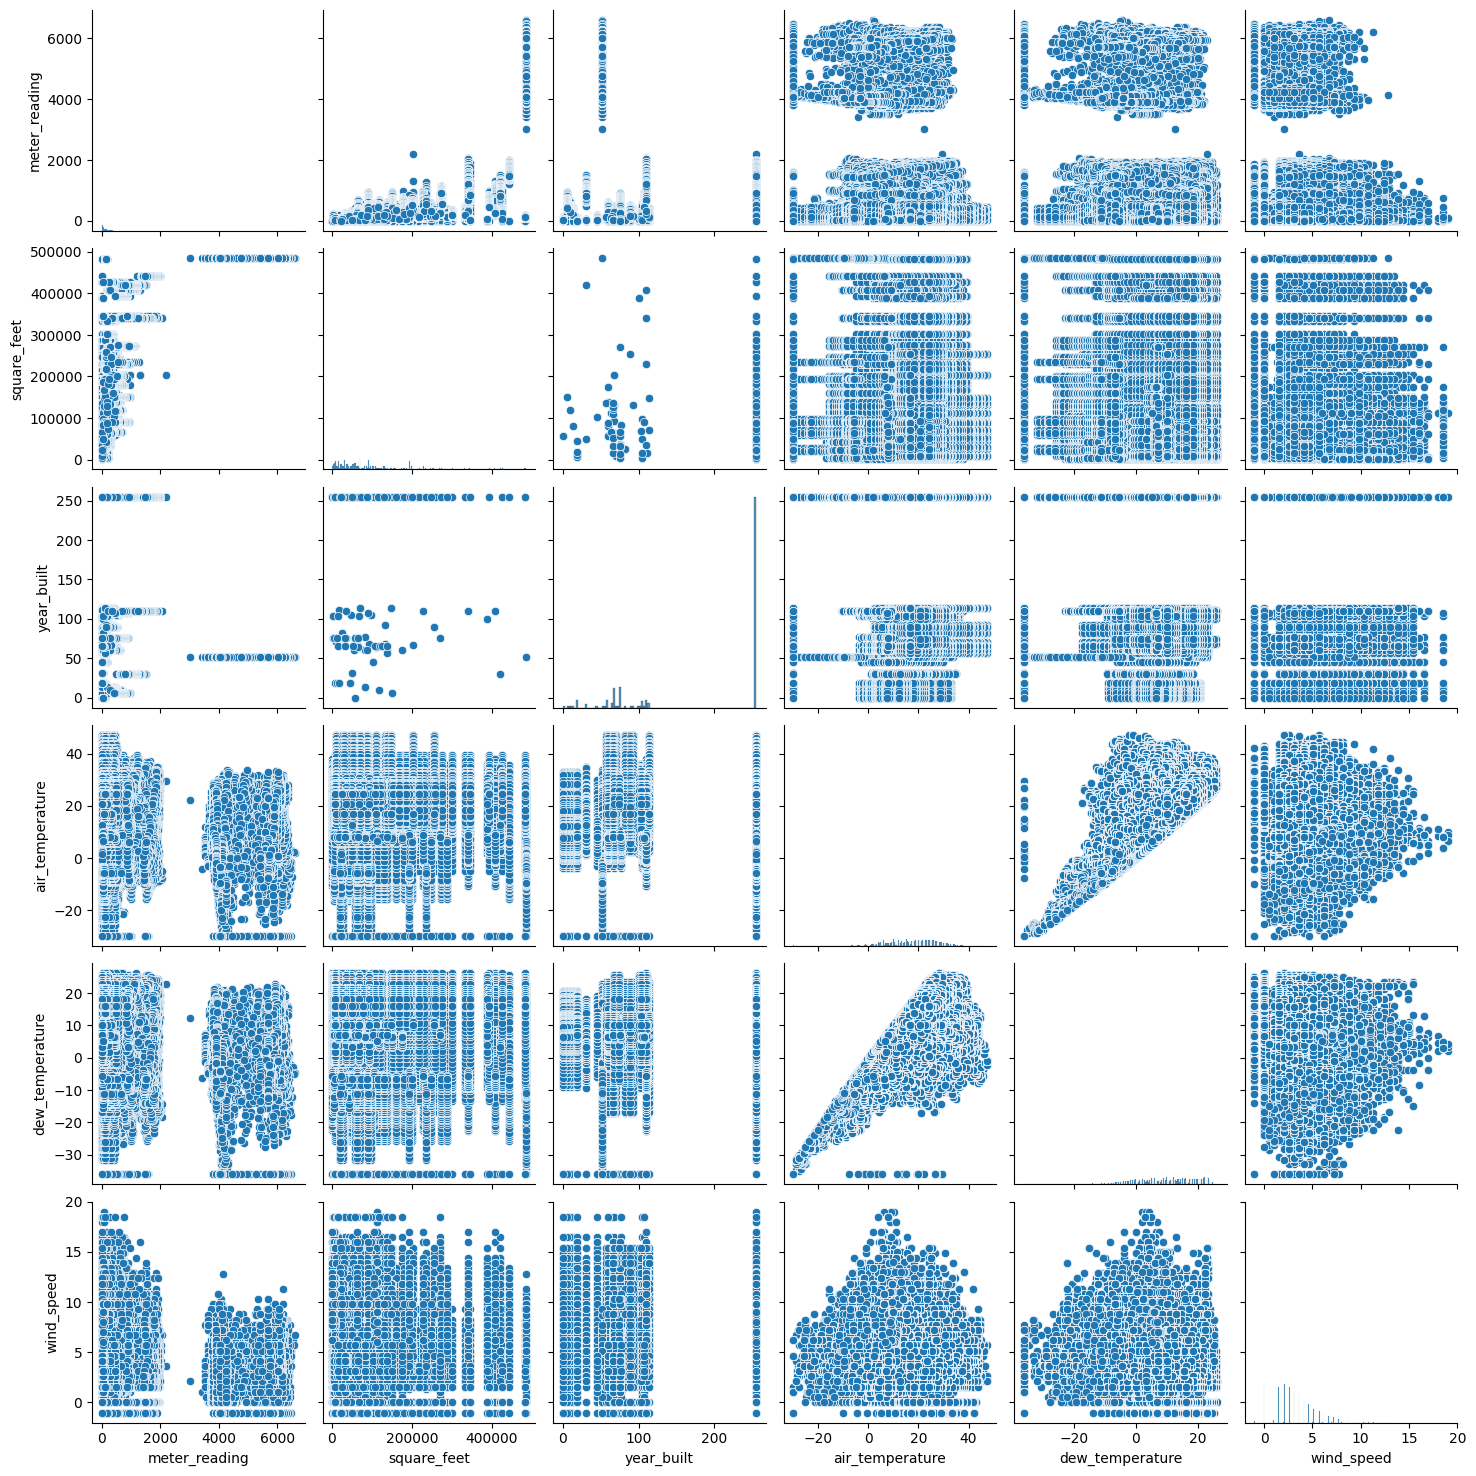

In [9]:
sns.pairplot(energy_anomaly[['meter_reading', 'square_feet', 'year_built', 'air_temperature', 'dew_temperature', 'wind_speed']])
plt.show()


Now let's check correlations.

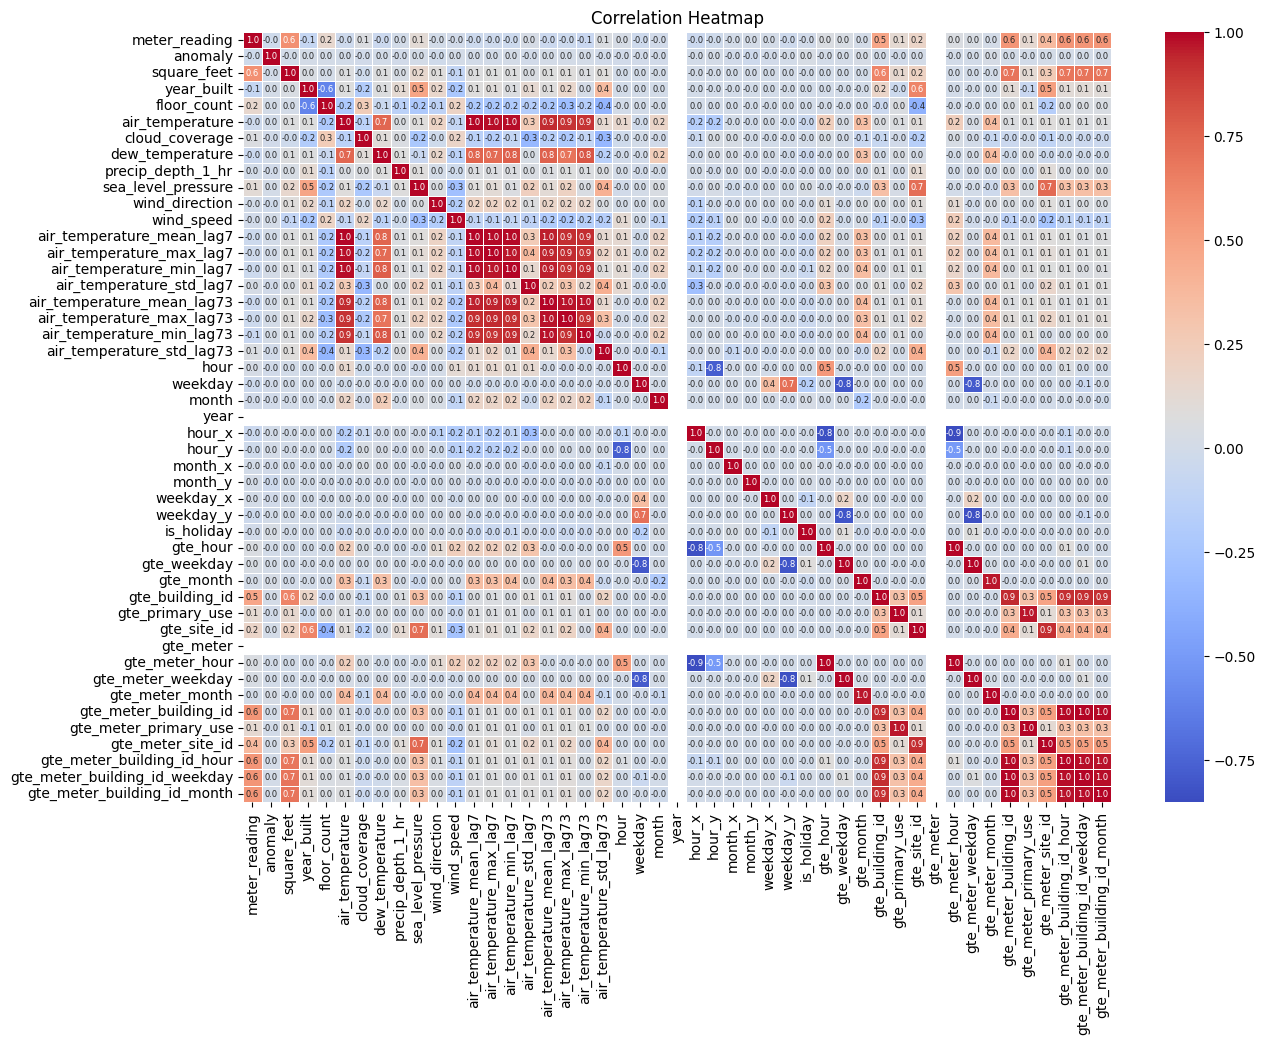

In [10]:
numeric_cols = energy_anomaly.drop(columns=['building_id', 'site_id']).select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 6}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Extraction

## Energy Anomaly Detection

Now let's extract the relevant features. This dataset is larger and contains some missing data, so I'm using imputation to deal with them. This feature extraction approach uses RandomForestRegressor model on numerical values to calculate importance. For the categorical values we will have separate discussion points in the report.

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

energy_anomaly = pd.read_csv('energy_anomaly_detection/train_features.csv')

energy_anomaly.drop(columns=['building_id', 'site_id', 'timestamp'], inplace=True)

# 
non_numeric_columns = energy_anomaly.select_dtypes(exclude=['float64', 'int64']).columns

energy_anomaly_numeric = energy_anomaly.drop(columns=non_numeric_columns)

X = energy_anomaly_numeric.drop(columns=['anomaly'])
y = energy_anomaly_numeric['anomaly']

#Drop columns with missing values
X = X.dropna(axis=1)

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X, y)

feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)


And plot the results.

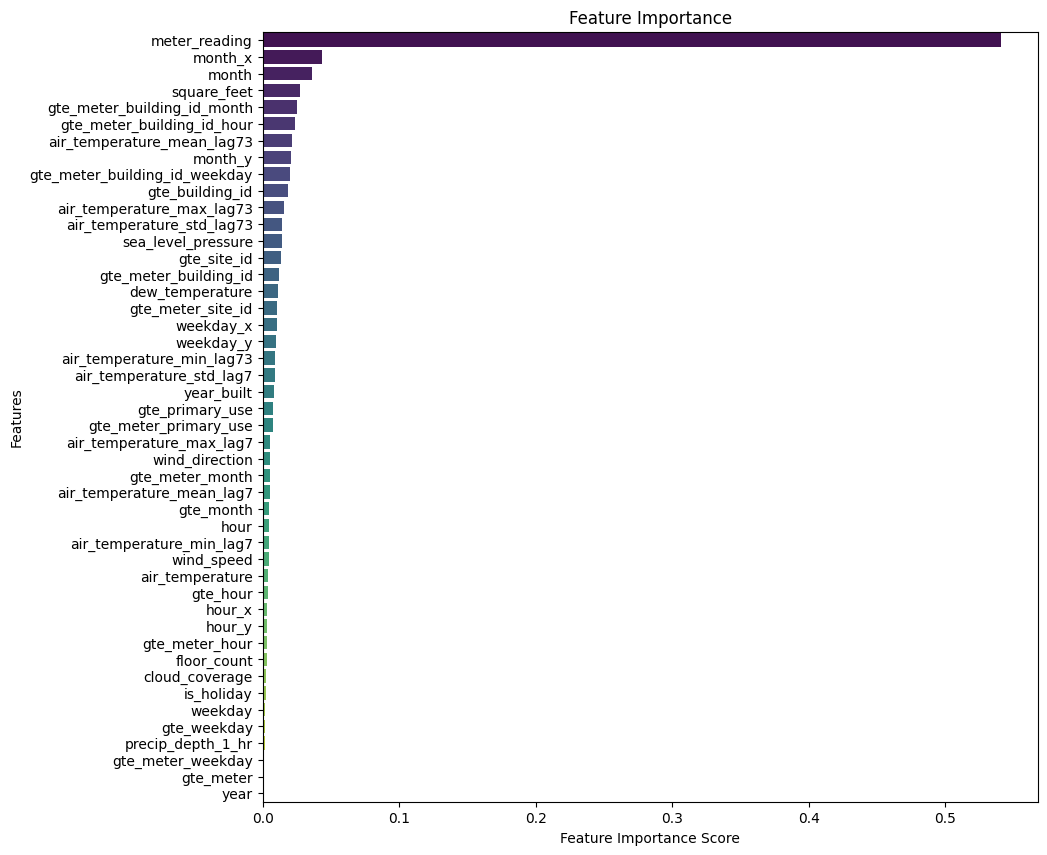

In [29]:
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances, y=feature_importances.index,hue=feature_importances.index, palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Non-numerical features
Let's check if our data contains any non-numerical data.

Index(['timestamp', 'primary_use', 'weekday_hour', 'building_weekday_hour',
       'building_weekday', 'building_month', 'building_hour',
       'building_meter'],
      dtype='object')


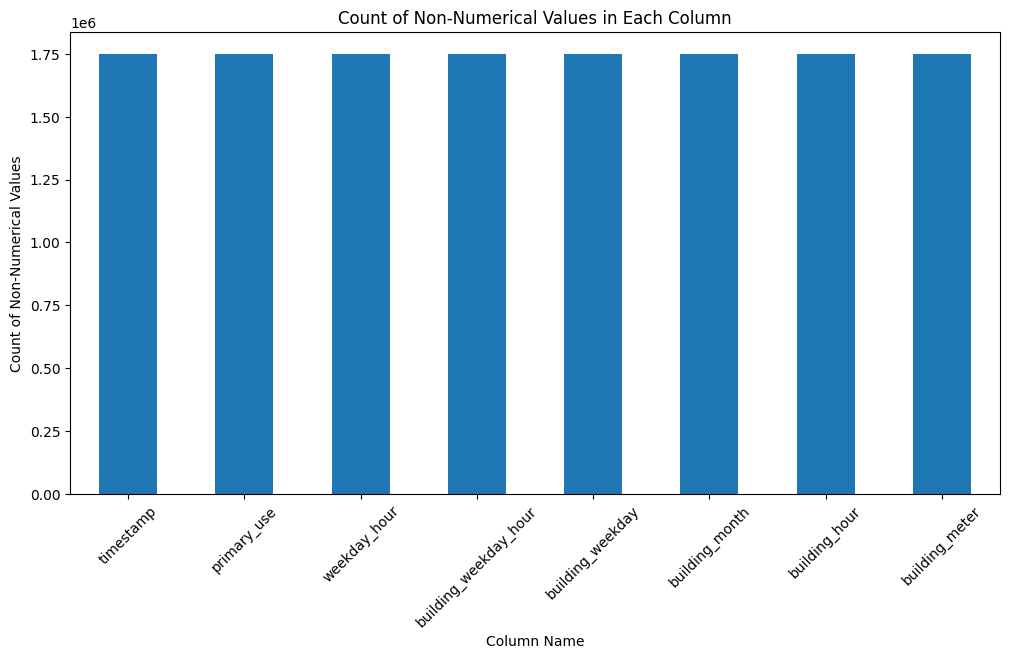

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

energy_anomaly = pd.read_csv('energy_anomaly_detection/train_features.csv')
non_numeric_col = energy_anomaly.select_dtypes(exclude=['number']).columns

print(non_numeric_col)

non_numeric = energy_anomaly[non_numeric_col].apply(lambda x: (~x.str.isnumeric()).sum())

plt.figure(figsize=(12, 6))
non_numeric.plot(kind='bar')
plt.title('Count of Non-Numerical Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Count of Non-Numerical Values')
plt.xticks(rotation=45)
plt.show()

The data does contain non-numerical features. It looks like all non-numeric columns have *only* non-numeric data, so we don't need to worry about matching up types. Let's see what kind of non-numeric data we're dealing with.

In [3]:
non_numeric_data = energy_anomaly.select_dtypes(exclude=['number'])
print(non_numeric_data)

                   timestamp                    primary_use weekday_hour  \
0        2016-01-01 00:00:00                      Education          4-0   
1        2016-01-01 00:00:00                         Office          4-0   
2        2016-01-01 00:00:00                         Office          4-0   
3        2016-01-01 00:00:00                         Office          4-0   
4        2016-01-01 00:00:00                        Parking          4-0   
...                      ...                            ...          ...   
1749489  2016-12-31 23:00:00  Entertainment/public assembly         5-23   
1749490  2016-12-31 23:00:00  Entertainment/public assembly         5-23   
1749491  2016-12-31 23:00:00  Entertainment/public assembly         5-23   
1749492  2016-12-31 23:00:00                         Office         5-23   
1749493  2016-12-31 23:00:00              Religious worship         5-23   

        building_weekday_hour building_weekday building_month building_hour  \
0       

Most are of the form `ID-weekday-hour` (with some variation on the theme). Another is a timestamp of the form `YYYY-MM-DD hh:mm:ss`, and finally we have "primary_use" which lists the use of the building, as a string. Let's see all the possible building types. 

In [4]:
print(energy_anomaly['primary_use'].unique())

['Education' 'Office' 'Parking' 'Lodging/residential'
 'Entertainment/public assembly' 'Public services'
 'Manufacturing/industrial' 'Services' 'Other' 'Healthcare'
 'Food sales and service' 'Religious worship']
